# First Spark Streaming Example
_____

# Twitter Example
Set up the credentials for a twitter app at https://apps.twitter.com/
    
install python-twitter, a python library to connect your Python to the twitter dev account.

Begin by running the TweetRead.py file. Make sure to add your own IP Adress and your credential keys.

In [1]:
import findspark 

In [2]:
findspark.init('/home/emanuel/Descargas/spark-3.1.2-bin-hadoop3.2')

In [3]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [4]:
# Can only run this once. restart your kernel for any errors.
sc = SparkContext()

In [5]:
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)

In [6]:
socket_stream = ssc.socketTextStream("127.0.0.1", 5557)

In [7]:
lines = socket_stream.window( 20 )

In [8]:
#Se crea una tupla.
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [9]:
# Use Parenthesis for multiple lines or use \.
( lines.flatMap(lambda text: text.split(" ")) #Se divide en una lista 
  .filter(lambda word: word.lower().startswith("#")) # Comprueba los hashtags y filtra las palabras que se encuntren al lado de #
  .map(lambda word: ( word.lower(), 1)) # Convierte todas las palabras en miníscula
  .reduceByKey(lambda a, b: a + b) # Reduces
  .map(lambda rec: Tweet(rec[0], rec[1])) # Almacenamos en un objeto de Tweet
  .foreachRDD(lambda rdd: rdd.toDF().sort(desc("count")) # Para cada RDD almacenamos los tweets en un marco de datos. 
  .limit(10) 
  .registerTempTable("tweets") ) 
) # Registramos en una tabla.

__________
### Run the TweetRead.py file at this point
__________

In [14]:
ssc.start()

In [17]:
tweetsView = sqlContext.sql('Select tag, count from tweets')
tweetsView.show()

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|               #sufc|    2|
|      #twitterblades|    2|
|           #gopackgo|    1|
|       #beardownpost|    1|
|               #efc!|    1|
|                  #8|    1|
|              #be…rt|    1|
|#exercisingpotential|    1|
|      #coltonhillspe|    1|
|      #trusttheclimb|    1|
+--------------------+-----+



In [12]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
# Only works for Jupyter Notebooks!
%matplotlib inline 

In [26]:
tweetsRead = sqlContext.sql( 'Select tag, count from tweets' )
tweetsReadDf = tweetsRead.toPandas().to_csv("sample_file.csv", header=True)

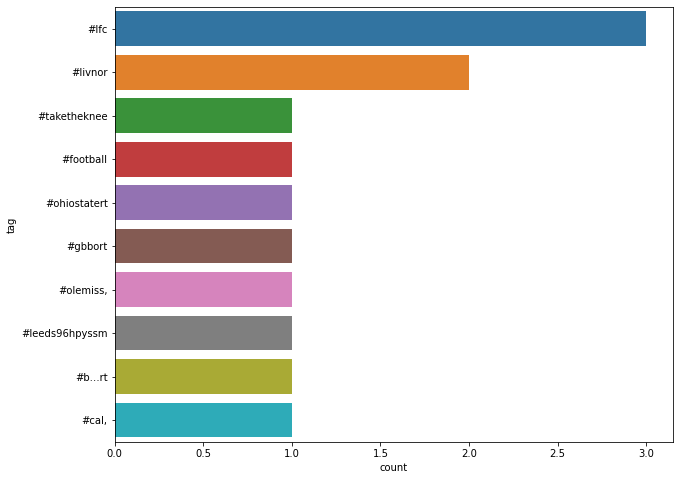

In [18]:
count = 0
while count < 10:
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

In [ ]:
ssc.stop()